# Genepy  
Artificial Life in a 2D environment.

__Author__: Paul Templier   
[My GitHub](https://github.com/TemplierPaul)  
[Contact Me](https://www.linkedin.com/in/paul-templier/?locale=en_US)  
__License__: CC-BY-SA-NC.

In [21]:
import matplotlib.pyplot as plt
from matplotlib import animation
from math import cos, sin, pi, radians, sqrt, exp
import numpy as np
import scipy
import random as rd
import warnings
warnings.filterwarnings("ignore")

### Global functions  
`dist(p0, p1)`: distance between positions p0 and p1  
`ID` and `get_id()`: global variable and method that yield an ID that stays unique across the whole game

In [11]:
def dist(p0, p1):
    dx = p0[0] - p1[0]
    dy = p0[1] - p1[1]
    return sqrt(dx ** 2 + dy ** 2)

ID = 0
def get_id():
    global ID
    ID += 1
    return ID

### Classes  
Next cell runs other noteboks to load classes needed for this notebook.  
- Brain: Neural Networks based on NeuroEvolution of Augmenting Topologies (NEAT) to simulate evolving decision functions
- Animal: class to represent an animal and implement its actions (reproduction etc.)
- Groups: grid-based storage to improve memory efficiency when computing actions between neighbour objects
- Map: class managing the simulation and the interactions between objects, also implements data analysis afterwards

In [96]:
%run Genepy_Brain.ipynb
%run Genepy_Animal.ipynb
%run Genepy_Groups.ipynb
%run Genepy_Map.ipynb

### Global Parameters  
Parameters to tune the simulation.
- MAP_CONFIG: map parameters (eg food growth)
- DNA_MAX: Maximum values for animal parameters (eg max size, max speed)
- BRAIN: Parameters for NEAT (eg inputs, outputs, nodes number)
- TRACKING: parameters to track

In [97]:
MAP_CONFIG = {
    'Season_time':100,
    'Grass_growth':2,
    'Initial_grass':40,
    'Food_distance':30,
    'Mate_distance':50,
    'Max_food':20
}

DNA_MAX = {
    "Size":50,
    "Speed":30,
    "Max_stamina":100, 
    "Mating_age":5,
    "Max_age":150,
    'Mutation_rate':0.15
}

BRAIN = {
    'f_mut':0.1,
    'p_add_con':0.1,
    'p_add_neuron':0.05,
    'std':0.1,
    'Inputs':['Size', 'Speed', 'Max_stamina', 'Stamina'],
    'Outputs':['d_v', 'omega']
}

TRACKING=["Size", "Speed", "Max_stamina"]

In [100]:
m = Map(size=1000)
m.fill_groups(n=[500, 10], v=[100, -50])
m.set_autopop(target='Animals', n=2, period=5)
an = m.animate(steps=500)
an

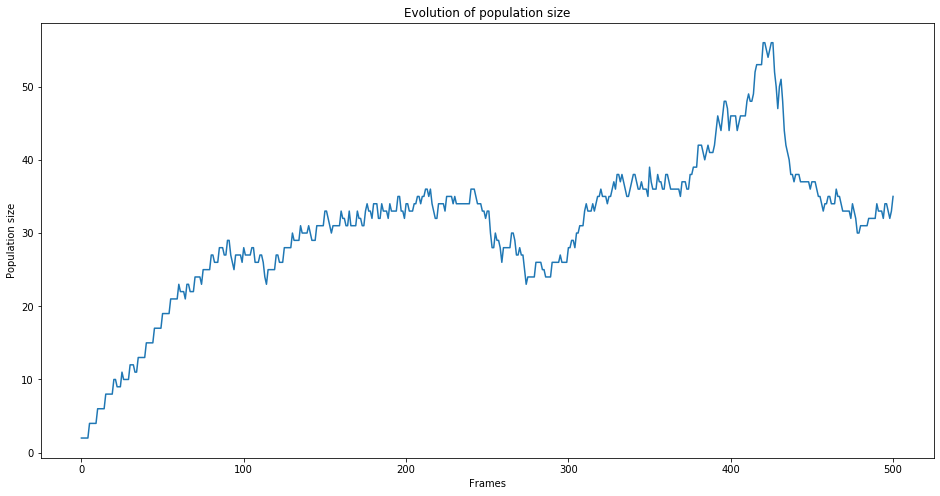

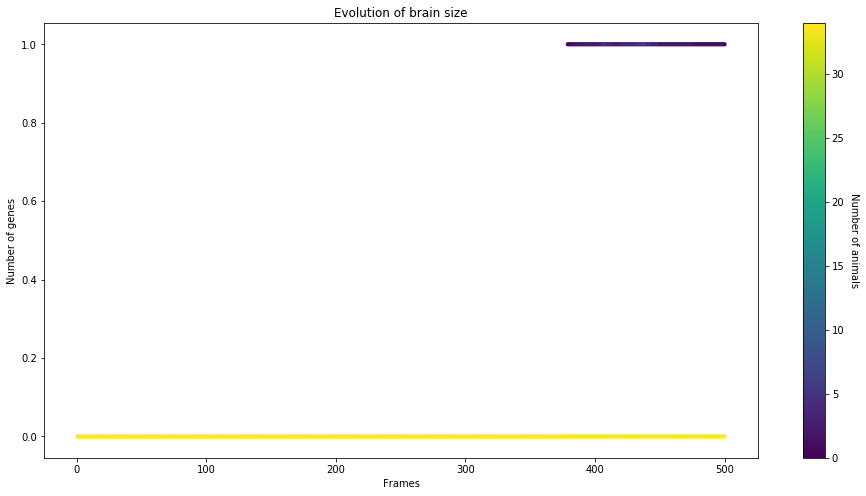

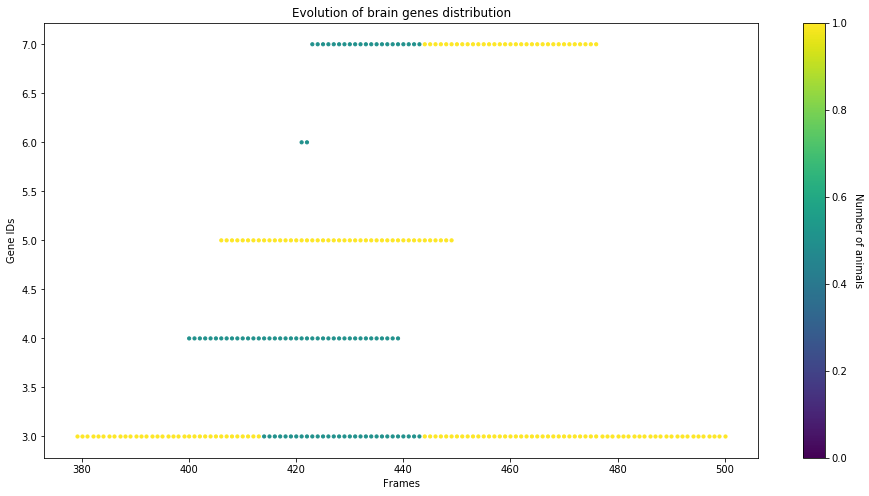

In [101]:
m.memory.analysis()

In [ ]:
d = m.memory.tracking['Size']

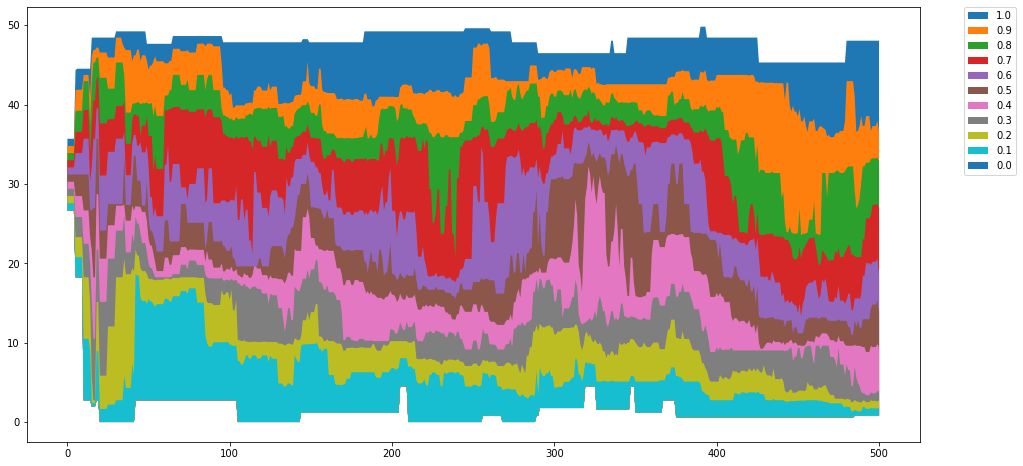

In [40]:
quantiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
data = {}

for q in quantiles:
    data[q]=[]

for i in range(len(d)):
    d_t = d[i]
    for q in quantiles:
        data[q].append(np.quantile(d_t, q))

x = np.arange(len(d))

plt.figure(figsize=(16, 8))

for q in np.flip(quantiles[1:]):
    plt.fill_between(x, data[0], data[q])

plt.legend(np.flip(quantiles[1:]), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


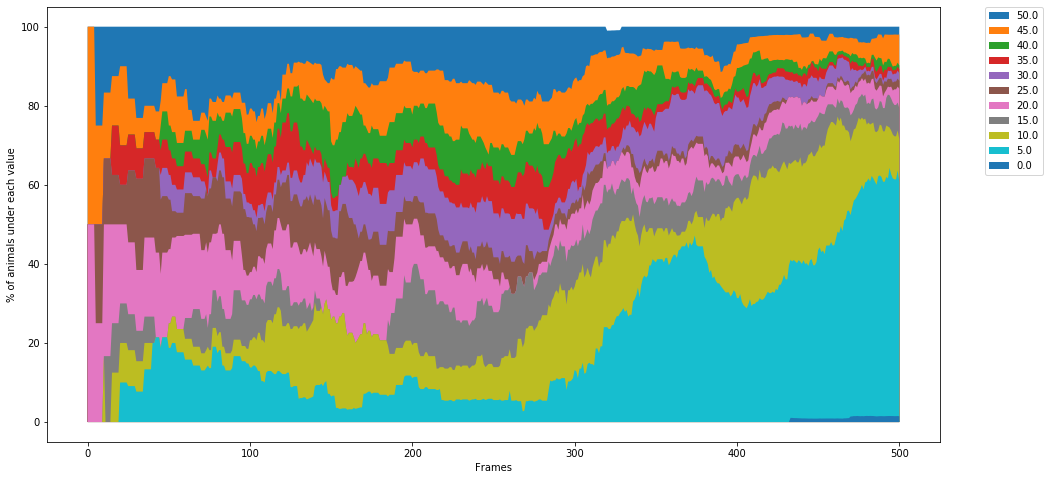

In [23]:
tiers = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) * DNA_MAX['Size']
data = {}

for q in tiers:
    data[q]=[]

for i in range(len(d)):
    d_t = d[i]
    for q in tiers:
        data[q].append(scipy.stats.percentileofscore(d_t, q))

x = np.arange(len(d))

plt.figure(figsize=(16, 8))
plt.xlabel('Frames')
plt.ylabel('% of animals under each value')

for q in np.flip(tiers):
    plt.fill_between(x, 0, data[q])

plt.legend(np.flip(tiers), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

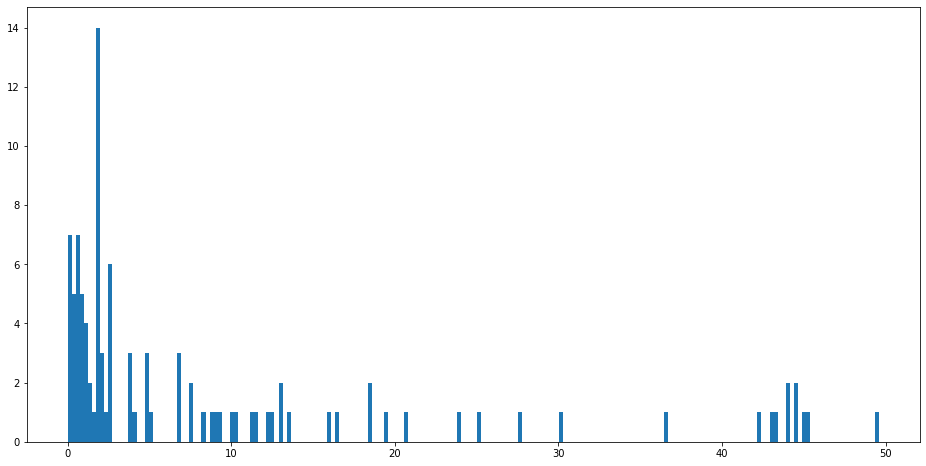

In [24]:
plt.figure(figsize=(16, 8))
plt.hist(d[-1], bins=200)
plt.show()

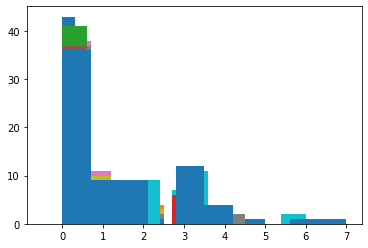

In [55]:
for l in m.memory.brain_size:
    plt.hist(l)

In [54]:
m.memory.brain_size

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

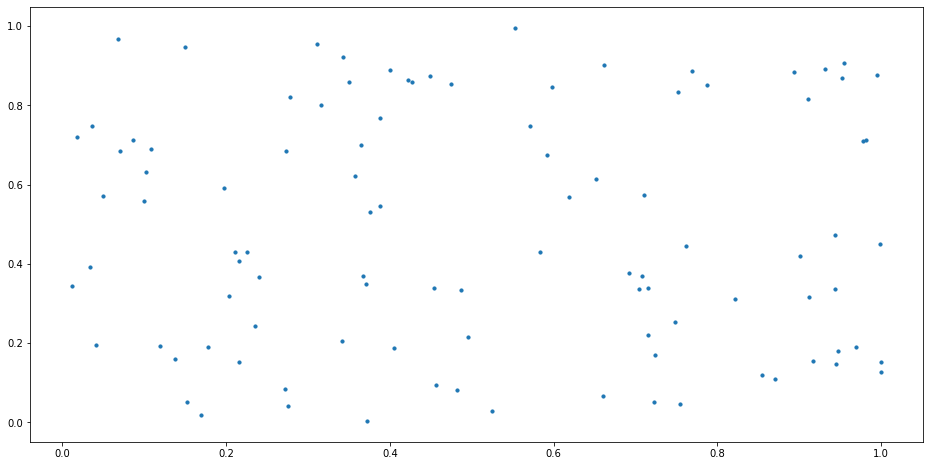

In [80]:
x = [rd.random() for _ in range(100)]
y = [rd.random() for _ in range(100)]
plt.figure(figsize=(16, 8))
plt.scatter(x, y, s=10)